In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 
import tensorflow as tf
import pandas as pd
from sklearn.ensemble import RandomForestClassifier 
import numpy as np  #匯入隨機森林
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# 讀取鐵達尼號訓練集和測試集資料
train_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv1/train.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/csv1/test.csv')


In [ ]:
# 選擇需要使用的特徵列
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train = train_data[features]
X_test = test_data[features]

# 將類別特徵轉換為數值特徵 字串轉數字
X_train["Sex"] = X_train["Sex"].map({"male": 1, "female": 2})
#X_train["Pclass"] = X_train["Pclass"].map({"3": 3, "2": 2,"1": 1})
X_train["Embarked"] = X_train["Embarked"].map({"S": 1, "C": 2, "Q": 3})
X_test["Sex"] = X_test["Sex"].map({"male": 1, "female": 1})
#X_test["Pclass"] = X_test["Pclass"].map({"3": 3, "2": 2,"1": 1})
X_test["Embarked"] = X_test["Embarked"].map({"S": 1, "C": 2, "Q": 3})

# 將缺失值填補為平均值
X_train.fillna(X_train.mean(), inplace=True)
X_test.fillna(X_test.mean(), inplace=True)



In [ ]:
# 選擇預測目標列
y_train = train_data["Survived"]

# 分割訓練集為訓練集和驗證集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# 使用Random Forest進行訓練
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)



In [ ]:
# 進行預測
y_pred = rf.predict(X_val)

# 計算模型的準確率
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8212290502793296


In [ ]:
# 計算存活率
survival_rate = sum(y_pred)/len(y_pred)
print('存活率:', survival_rate)

存活率: 0.37988826815642457


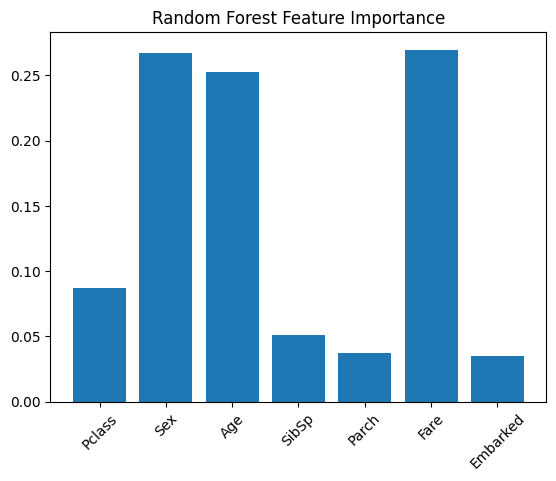

In [ ]:
feature_importances = rf.feature_importances_
feature_names = X_train.columns
plt.bar(feature_names, feature_importances)
plt.xticks(rotation=45)
plt.title("Random Forest Feature Importance")
plt.show()